# Integração de Dados DI PRE OVER na Análise de Risco
# DI PRE OVER Data Integration in Risk Analysis

Este notebook integra dados da taxa DI (Depósito Interfinanceiro) para fornecer uma análise de risco mais precisa, utilizando uma taxa livre de risco dinâmica em vez de constante.

This notebook integrates DI (Interbank Deposit) rate data to provide more accurate risk analysis, using a dynamic risk-free rate instead of a constant one.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.analysis.risk_metrics import IbovespaRiskAnalyzer
from src.data.di_loader import load_di_data
from src.visualization import plots

# Configuração de estilo
plt.style.use('dark_background')
sns.set_palette("husl")

## 1. Carregamento de Dados DI | Loading DI Data
Carregando dados do arquivo DI_PRE_OVER_5y.xls processado.

In [2]:
# Carregar dados DI
di_data = load_di_data('../data/DI_PRE_OVER_5y.xls')

# Exibir primeiras linhas
print("DI Data Head:")
display(di_data.head())

DI Data Head:


,daily_factor,selic_annual,di_daily_rate,di_annualized
date,,,,
2020-01-02,1.000171,4.4,0.000171,0.044001
2020-01-03,1.000171,4.4,0.000171,0.044001
2020-01-06,1.000171,4.4,0.000171,0.044001
2020-01-07,1.000171,4.4,0.000171,0.044001
2020-01-08,1.000171,4.4,0.000171,0.044001


## 2. Visualização da Taxa DI | DI Rate Visualization
Visualizando a evolução da taxa SELIC/DI anualizada ao longo do tempo.

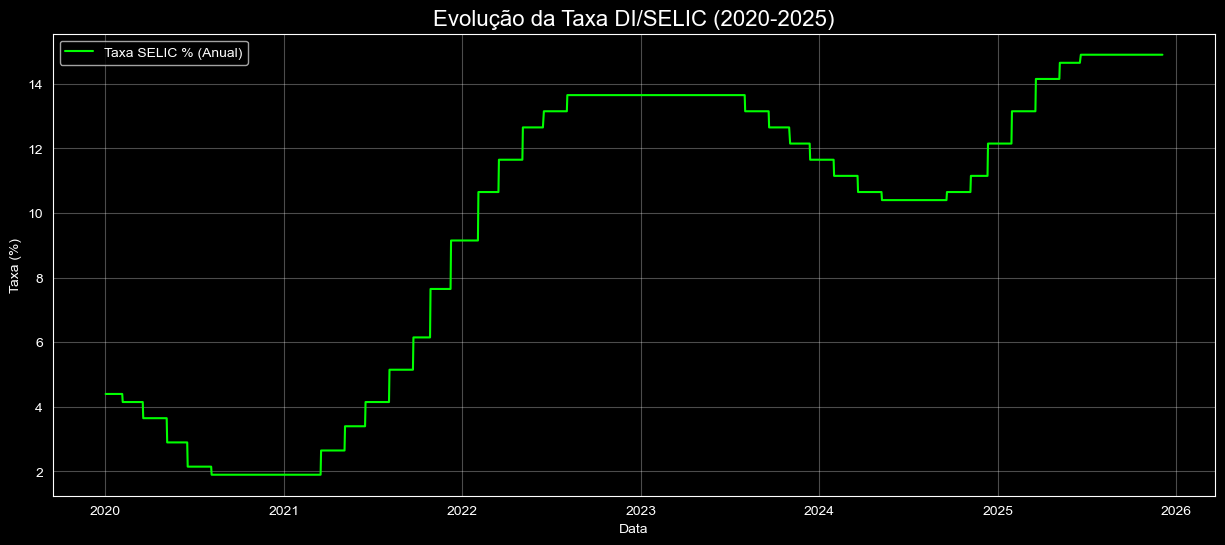

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(di_data.index, di_data['selic_annual'], color='#00ff00', label='Taxa SELIC % (Anual)')
plt.title('Evolução da Taxa DI/SELIC (2020-2025)', fontsize=16)
plt.ylabel('Taxa (%)')
plt.xlabel('Data')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 3. Análise de Ações com Benchmark Dinâmico | Stock Analysis with Dynamic Benchmark

In [4]:
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA']
analyzer = IbovespaRiskAnalyzer(tickers, start_date='2020-01-02') # Alinhando com início dos dados DI
data = analyzer.download_data()

📊 Downloading data for 5 stocks...
📅 Period: 2020-01-02 to 2025-12-07
✅ Downloaded 1479 days of data


In [5]:
# Calcular métricas usando DI como risk-free
metrics_di = analyzer.calculate_all_metrics(di_data=di_data)
summary_di = analyzer.get_latest_metrics()

print("Métricas com DI Dinâmico:")
display(summary_di)


📈 Calculating risk metrics for: PETR4, VALE3, ITUB4, BBDC4, ABEV3
  ℹ️  Using custom implementations (pandas + numpy)
  ℹ️  Using dynamic DI risk-free rates
  ⚙️  Calculating Sharpe Ratio...
  ⚙️  Calculating Sortino Ratio...
  ⚙️  Calculating Volatility...
  ⚙️  Calculating Maximum Drawdown...
  ⚙️  Calculating Value at Risk (VaR)...
  ⚙️  Calculating Conditional VaR (CVaR)...
  ⚙️  Calculating Semi-Deviation...
  ⚙️  Calculating Ulcer Index...
  ⚙️  Calculating Mean Absolute Deviation...
✅ All metrics calculated successfully!

Métricas com DI Dinâmico:


,sharpe,sortino,volatility,max_drawdown,var,cvar,semidev,ulcer,mad
PETR4,0.517615,0.606275,0.419141,-0.633561,-0.036033,-0.062347,0.357656,0.177838,0.016927
VALE3,0.312563,0.481343,0.355660,-0.413430,-0.030052,-0.045762,0.230904,0.229947,0.015316
ITUB4,0.150010,0.206587,0.305449,-0.437531,-0.026970,-0.043284,0.222083,0.203595,0.013485
BBDC4,-0.083503,-0.110534,0.360930,-0.527428,-0.030979,-0.052082,0.273174,0.326382,0.015064
ABEV3,-0.205014,-0.285059,0.287837,-0.425820,-0.025963,-0.039913,0.206933,0.229179,0.012464


## 4. Comparação: Taxa Fixa vs Dinâmica | Comparison: Fixed vs Dynamic Rate
Comparando Sharpe Ratio calculado com taxa zero vs taxa DI.


📈 Calculating risk metrics for: PETR4, VALE3, ITUB4, BBDC4, ABEV3
  ℹ️  Using custom implementations (pandas + numpy)
  ℹ️  Using constant risk-free rate (0.0)
  ⚙️  Calculating Sharpe Ratio...
  ⚙️  Calculating Sortino Ratio...
  ⚙️  Calculating Volatility...
  ⚙️  Calculating Maximum Drawdown...
  ⚙️  Calculating Value at Risk (VaR)...
  ⚙️  Calculating Conditional VaR (CVaR)...
  ⚙️  Calculating Semi-Deviation...
  ⚙️  Calculating Ulcer Index...
  ⚙️  Calculating Mean Absolute Deviation...
✅ All metrics calculated successfully!



,Sharpe (Risk-Free=0),Sharpe (Risk-Free=DI),Diff
PETR4,0.719940,0.517615,0.202325
VALE3,0.557077,0.312563,0.244514
ITUB4,0.421895,0.150010,0.271885
BBDC4,0.140793,-0.083503,0.224295
ABEV3,0.097055,-0.205014,0.302068


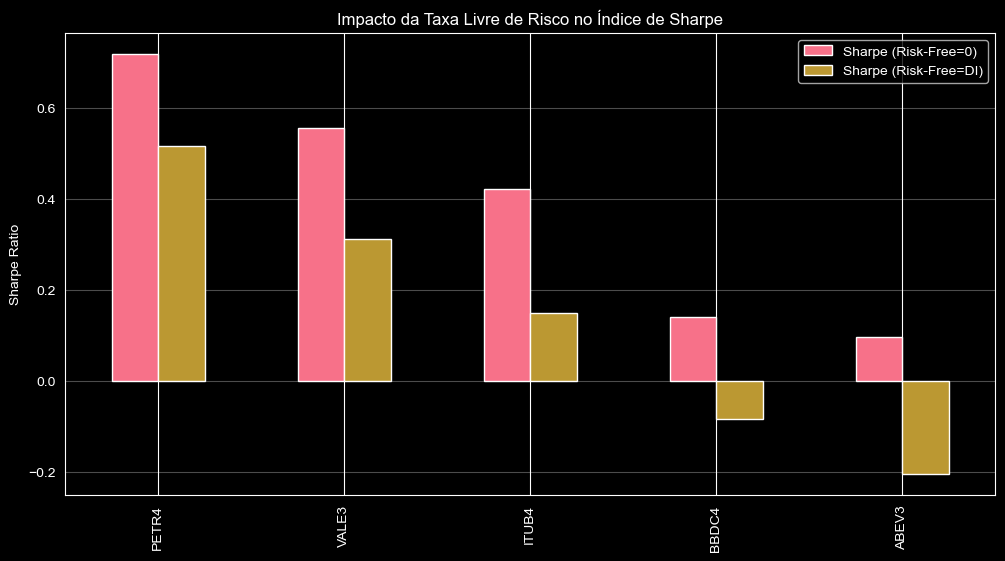

In [6]:
# Calcular com taxa zero (padrão)
metrics_fixed = analyzer.calculate_all_metrics(di_data=None)
summary_fixed = analyzer.get_latest_metrics()

# Criar DataFrame de comparação
comparison = pd.DataFrame({
    'Sharpe (Risk-Free=0)': summary_fixed['sharpe'],
    'Sharpe (Risk-Free=DI)': summary_di['sharpe'],
    'Diff': summary_fixed['sharpe'] - summary_di['sharpe']
})

display(comparison)

comparison[['Sharpe (Risk-Free=0)', 'Sharpe (Risk-Free=DI)']].plot(kind='bar', figsize=(12, 6))
plt.title('Impacto da Taxa Livre de Risco no Índice de Sharpe')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y', alpha=0.3)
plt.show()